In [2]:
#import packages
import numpy as np
import copy
import pandas
import os
import imp
import pickle
from scipy.interpolate import interp1d
import warnings
import time
import matplotlib.pyplot as plt
import inspect
import types
import math as mat
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import datetime
from matplotlib import animation
from IPython.display import HTML
from tempfile import NamedTemporaryFile
import matplotlib.backends.backend_pdf
from scipy import interpolate
from itertools import groupby
import re
import csv
import copy
from fnmatch import fnmatch
import json
import copy
import math
import glob
pi = math.pi

sns.set()
sns.set_style()
%matplotlib inline

In [3]:
#functions
def get_elapsed_time(my_list):
#for list of lists
    all_t_ellapsed = []
    for i in range(len(my_list)):
        t_ellapsed = my_list[i] - my_list[0]
        all_t_ellapsed.append(t_ellapsed)
    return all_t_ellapsed

def create_circle():
    circle= plt.Circle((0,0), radius= 1)
    return circle

def show_shape(patch):
    ax=plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()

In [4]:
dataDir = "/Users/fponce/Documents/pilot_round_2/data"

mystr = 'trial*'

datapaths = []
for path, subdirs, files in os.walk(dataDir):
    for name in files:
        #all_files.append(name)
        if fnmatch(name, mystr):
            datapaths.append(os.path.join(path, name))

print(len(datapaths))

#renaming files that end with .txt with the name of their directory + filename
# for f in datapaths:
#     ff = (os.path.dirname(f))
#     k = os.path.split(os.path.dirname(f))[-1]
#     k1 = os.path.basename(f)
#     os.rename(f, os.path.join(ff, k+'_'+k1)) 

0


In [5]:
mystr = 'exp*'

exp_datapaths = []
for path, subdirs, files in os.walk(dataDir):
    for name in subdirs:
        #all_files.append(name)
        if fnmatch(name, mystr):
            exp_datapaths.append(os.path.join(path, name))

#taken from metadata file
food_condition_per_exp = [5,5,5,10,5,10,5,5,5,20,10,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,20,5,2,1 ,20,10,5,1 ,1 ,1 ,10 ,15,5,15,15]

all_fc = []
for i in range(len(exp_datapaths)):
    fc = np.ones(len(next(os.walk(exp_datapaths[i]))[1]))*food_condition_per_exp[i]
    all_fc.append(fc)

#flattening list
all_fc = [y for x in all_fc for y in x]
print(len(all_fc))
print(len(exp_datapaths))

212
34


In [6]:
#used to remove videos

# mystr = '*.mkv'

# datapaths = []
# for path, subdirs, files in os.walk(dataDir):
#     for name in files:
#         all_files.append(name)
#         if fnmatch(name, mystr):
#             datapaths.append(os.path.join(path, name))

# for f in datapaths:
#     os.remove(f)

In [7]:
#making a list of paths to files

#finding cnc files
str_cnc = '*cnc.txt'

datapaths_cnc = []
for path, subdirs, files in os.walk(dataDir):
    for name in files:
        if fnmatch(name, str_cnc):
            datapaths_cnc.append(os.path.join(path, name))
print(len(datapaths_cnc))

#finding cam files
str_cam = '*cam.txt'

datapaths_cam = []
for path, subdirs, files in os.walk(dataDir):
    for name in files:
        if fnmatch(name, str_cam):
            datapaths_cam.append(os.path.join(path, name))
print(len(datapaths_cam))

str_opto = '*opto.txt'

datapaths_opto = []
for path, subdirs, files in os.walk(dataDir):
    for name in files:
        if fnmatch(name, str_opto):
            datapaths_opto.append(os.path.join(path, name))
print(len(datapaths_opto))

print(datapaths_cnc[0])
print(datapaths_cam[0])
print(datapaths_opto[0])

212
212
212
/Users/fponce/Documents/pilot_round_2/data/exp-20191016-101743/trial-1-20191016-101825/cnc.txt
/Users/fponce/Documents/pilot_round_2/data/exp-20191016-101743/trial-1-20191016-101825/cam.txt
/Users/fponce/Documents/pilot_round_2/data/exp-20191016-101743/trial-1-20191016-101825/opto.txt


In [8]:
#reading in the data (t,x,y) into separate lists and 
#appending them into a list of all the files tested

#cnc files
allfiles_t_cnc_s = []
allfiles_x_cnc_s = []
allfiles_y_cnc_s = []        
for i in range(len(datapaths_cnc)):
    t_cnc = []
    x_cnc = []
    y_cnc = []
    with open (datapaths_cnc[i]) as myfile:
        for line in myfile:
            x1,x2,x3 = line.rstrip().split(',')
            t_cnc.append(x1)
            x_cnc.append(x2)
            y_cnc.append(x3)
    allfiles_t_cnc_s.append(t_cnc)
    allfiles_x_cnc_s.append(x_cnc)
    allfiles_y_cnc_s.append(y_cnc)

#cam files
allfiles_t_cam_s = []
allfiles_x_cam_s = []
allfiles_y_cam_s = [] 
allfiles_a_cam_s = [] #angle
for i in range(len(datapaths_cam)):
    t_cam = []
    x_cam = []
    y_cam = []
    a_cam = []
    with open (datapaths_cam[i]) as myfile:
        for line in myfile:
            x1,x2,x3,x4 = line.rstrip().split(',')
            t_cam.append(x1)
            x_cam.append(x2)
            y_cam.append(x3)
            a_cam.append(x4)
    allfiles_t_cam_s.append(t_cam)
    allfiles_x_cam_s.append(x_cam)
    allfiles_y_cam_s.append(y_cam)
    allfiles_a_cam_s.append(a_cam)
    
#opto files    
allfiles_t_food_s = []
allfiles_x_food_s = []
allfiles_y_food_s = [] 
allfiles_t_led_s = []
allfiles_status_led_s = []
for i in range(len(datapaths_opto)):
    t_food = []
    x_food = []
    y_food = []
    t_led = []
    status_led = []
    with open (datapaths_opto[i]) as myfile:
        for line in myfile:
            x = line.rstrip().split(',')
            if x[0] == 'food':
                x1,x2,x3,x4 = line.rstrip().split(',')
                t_food.append(x2)
                x_food.append(x3)
                y_food.append(x4)
            elif x[0] == 'led':
                x1,x2,x3 = line.rstrip().split(',')
                t_led.append(x2)
                status_led.append(x3)  
    allfiles_t_food_s.append(t_food)
    allfiles_x_food_s.append(x_food)
    allfiles_y_food_s.append(y_food) 
    allfiles_t_led_s.append(t_led)
    allfiles_status_led_s.append(status_led)

In [16]:
#transform values in lists from strings to floats and get rid of the first line which are strings (t,x,y)

#cnc
allfiles_t_cnc = []
allfiles_x_cnc = []
allfiles_y_cnc = []        
for i in range(len(allfiles_t_cnc_s)):
    t_cnc_file = []
    x_cnc_file = []
    y_cnc_file = []
    for j in range(1,len(allfiles_t_cnc_s[i])):
        t_cnc = float(allfiles_t_cnc_s[i][j])
        x_cnc = float(allfiles_x_cnc_s[i][j])
        y_cnc = float(allfiles_y_cnc_s[i][j])
        t_cnc_file.append(t_cnc)
        x_cnc_file.append(x_cnc)
        y_cnc_file.append(y_cnc)
    allfiles_t_cnc.append(t_cnc_file)
    allfiles_x_cnc.append(x_cnc_file)
    allfiles_y_cnc.append(y_cnc_file)

#cam
allfiles_t_cam = []
allfiles_x_cam = []
allfiles_y_cam = []        
for i in range(len(allfiles_t_cam_s)):
    t_cam_file = []
    x_cam_file = []
    y_cam_file = []
    for j in range(1,len(allfiles_t_cam_s[i])):
        t_cam = float(allfiles_t_cam_s[i][j])
        x_cam = float(allfiles_x_cam_s[i][j])
        y_cam = float(allfiles_y_cam_s[i][j])
        t_cam_file.append(t_cam)
        x_cam_file.append(x_cam)
        y_cam_file.append(y_cam)
    allfiles_t_cam.append(t_cam_file)
    allfiles_x_cam.append(x_cam_file)
    allfiles_y_cam.append(y_cam_file)

#opto
#food
allfiles_t_food = []
allfiles_x_food = []
allfiles_y_food = []    
for i in range(len(allfiles_t_food_s)):
    t_food_file = []
    x_food_file = []
    y_food_file = [] 
    for j in range(len(allfiles_t_food_s[i])):
        t_food = float(allfiles_t_food_s[i][j])
        x_food = float(allfiles_x_food_s[i][j])
        y_food = float(allfiles_y_food_s[i][j])
        t_food_file.append(t_food)
        x_food_file.append(x_food)
        y_food_file.append(y_food)
    allfiles_t_food.append(t_food_file)
    allfiles_x_food.append(x_food_file)
    allfiles_y_food.append(y_food_file)

#led    
allfiles_t_led = []  
for i in range(len(allfiles_t_led_s)):
    t_led_file = []
    for j in range(len(allfiles_t_led_s[i])):
        t_led = float(allfiles_t_led_s[i][j])
        t_led_file.append(t_led )
    allfiles_t_led.append(t_led_file)
    
allfiles_status_led = []  
for i in range(len(allfiles_status_led_s)):
    allfiles_status_led_file = []
    for j in range(len(allfiles_status_led_s[i])):
        s_led = str(allfiles_status_led_s[i][j])
        allfiles_status_led_file.append(s_led)
    allfiles_status_led.append(allfiles_status_led_file)
    
#checking in files are empty and erasing the cnc, cam, opto
#files that correspond to that experiment
all_files_to_erase = []
for i in range(len(datapaths_cnc)):
    if len(allfiles_t_cnc[i])>0 and len(allfiles_t_cam[i])>0:
        pass
    else:
        all_files_to_erase.append(i)

allfiles_t_cnc = np.delete(allfiles_t_cnc, all_files_to_erase).tolist()
allfiles_x_cnc = np.delete(allfiles_x_cnc, all_files_to_erase).tolist()
allfiles_y_cnc = np.delete(allfiles_y_cnc, all_files_to_erase).tolist()
    
allfiles_t_cam = np.delete(allfiles_t_cam, all_files_to_erase).tolist()
allfiles_x_cam = np.delete(allfiles_x_cam, all_files_to_erase).tolist()
allfiles_y_cam = np.delete(allfiles_y_cam, all_files_to_erase).tolist()

allfiles_t_food = np.delete(allfiles_t_food, all_files_to_erase).tolist()
allfiles_x_food = np.delete(allfiles_x_food, all_files_to_erase).tolist()
allfiles_y_food = np.delete(allfiles_y_food, all_files_to_erase).tolist()
    
allfiles_t_led = np.delete(allfiles_t_led, all_files_to_erase).tolist()
allfiles_status_led = np.delete(allfiles_status_led, all_files_to_erase).tolist()

In [17]:
#getting elapsed times
allfiles_et_cnc = []
allfiles_et_cam = []
allfiles_et_food = []
allfiles_et_led = []
for i in range(len(allfiles_t_cnc)):
    et_cnc = get_elapsed_time((allfiles_t_cnc[i]))
    et_cam = get_elapsed_time((allfiles_t_cam[i]))
    et_food = get_elapsed_time((allfiles_t_food[i]))
    et_led = get_elapsed_time((allfiles_t_led[i]))
    allfiles_et_cnc.append(et_cnc)
    allfiles_et_cam.append(et_cam)
    allfiles_et_food.append(et_food)
    allfiles_et_led.append(et_led)

In [18]:
#get the common code for each trial of cnc, cam, and opto files
all_experiment_names = []
for i in range(len(datapaths_cam)):
    exp_name = os.path.split(os.path.dirname(datapaths_cnc[i]))[-1]
    all_experiment_names.append(exp_name)

all_experiment_names = np.delete(all_experiment_names, all_files_to_erase).tolist()
print(len(all_experiment_names))

all_food_condition = np.delete(all_fc, all_files_to_erase).tolist()
print(len(all_food_condition))

212
212


In [19]:
#interpolating using a vector the size of cnc time (why not cam?, ?)

allfiles_x_cnc_reg = []
allfiles_y_cnc_reg = []
allfiles_x_cam_reg = []
allfiles_y_cam_reg = []
allfiles_t_reg = []
for i in range(len(allfiles_t_cnc)):
    
    reg_t_cnc = np.arange(allfiles_t_cnc[i][0], allfiles_t_cnc[i][-1],0.01)
    reg_t_cam = np.arange(allfiles_t_cam[i][0], allfiles_t_cam[i][-1],0.01)
    
    if len(reg_t_cnc)>=len(reg_t_cam):
        reg_t = reg_t_cnc
    else:
        reg_t = reg_t_cam

    f_x_cnc = interp1d(allfiles_t_cnc[i], allfiles_x_cnc[i], bounds_error=False)
    f_y_cnc = interp1d(allfiles_t_cnc[i], allfiles_y_cnc[i], bounds_error=False)

    f_x_cam = interp1d(allfiles_t_cam[i], allfiles_x_cam[i], bounds_error=False)
    f_y_cam = interp1d(allfiles_t_cam[i], allfiles_y_cam[i], bounds_error=False)       

    try:
        x_cnc_reg = f_x_cnc(reg_t)
        y_cnc_reg = f_y_cnc(reg_t)

        x_cam_reg = f_x_cam(reg_t)
        y_cam_reg = f_y_cam(reg_t)

    except:
        print('cant interpolate')

    allfiles_x_cnc_reg.append(x_cnc_reg)
    allfiles_y_cnc_reg.append(y_cnc_reg)
    allfiles_x_cam_reg.append(x_cam_reg)
    allfiles_y_cam_reg.append(y_cam_reg)
    allfiles_t_reg.append(reg_t)

In [20]:
#adding cnc + cam
allfiles_x = []
allfiles_y = []
for i in range(len(allfiles_x_cnc_reg)):
    x = allfiles_x_cnc_reg[i] + allfiles_x_cam_reg[i]
    y = allfiles_y_cnc_reg[i] + allfiles_y_cam_reg[i]
    allfiles_x.append(x)
    allfiles_y.append(y)

In [14]:
# #making_dictionaries to share data

# all_mydicts = []
# for i in range(len(all_experiment_names)):
#     #fly
#     t = allfiles_t_reg[i]
#     x = allfiles_x[i]
#     y = allfiles_y[i]
#     #food
#     t_food = allfiles_t_food[i]
#     x_food = allfiles_x_food[i]
#     y_food = allfiles_y_food[i]
#     #led
#     t_led = allfiles_t_led[i]
#     status_led = allfiles_status_led[i]
    
#     values = [t, x, y, t_food, x_food, y_food, t_led, status_led]
#     keys = ["t", "x", "y", 't_food', 'x_food', 'y_food','t_led', 'status_led']
#     dict_file = {keys[j]: values[j] for j in range(len(keys))}
#     all_mydicts.append(dict_file)
    
# all_keys = all_experiment_names
# all_values = all_mydicts

# all_data = {all_keys[k]: all_values[k] for k in range(len(all_keys))}

# your_data = all_data

# # Store data (serialize)
# with open('pilot_stanford_data_100410.pickle', 'wb') as handle:
#     pickle.dump(your_data, handle, protocol=2)

# # Load data (deserialize)
# with open('pilot_stanford_data_100410.pickle', 'rb') as handle:
#     unserialized_data = pickle.load(handle)

In [24]:
print(allfiles_x[0][0:100])

[       nan 0.35531205 0.35528286 0.35533387 0.3554037  0.35548324
 0.3555183  0.35547446 0.35542898 0.35541577 0.3554469  0.3554919
 0.3555032  0.35547697 0.35543987 0.35542641 0.35544944 0.35548331
 0.35549203 0.35547461 0.3554485  0.35543642 0.35544846 0.35547221
 0.3554775  0.35547099 0.35545256 0.35546679 0.35550303 0.35554381
 0.35557969 0.35560962 0.35563961 0.35568533 0.35573352 0.35577721
 0.3558217  0.35585425 0.35586744 0.35587823 0.35589467 0.35590999
 0.35591452 0.35590934 0.35589448 0.35588698 0.35589184 0.35590396
 0.3559135  0.35591012 0.35591375 0.35591699 0.35592861 0.35593329
 0.35593431 0.35593117 0.35592838 0.35592978 0.35593208 0.35592903
 0.35592258 0.35591598 0.35591216 0.3559134  0.35591884 0.35592158
 0.35592007 0.35591585 0.35591178 0.35591112 0.35591597 0.35591737
 0.35591305 0.35590699 0.3559051  0.35590852 0.35591414 0.3559158
 0.35591085 0.3559058  0.35590637 0.35591274 0.35591719 0.35592002
 0.35591589 0.35591024 0.35590647 0.3559118  0.35591662 0.355917

In [21]:
def plot_raw_data(x, y, food_x, food_y, mytitle, savefigdir):
    
    fig, axs = plt.subplots(1,1,figsize=(10,10))     
    
    plt.plot(x, y, 'k')
    plt.scatter(x[0], y[0], color = 'g', s = 50)
    #plt.scatter(centered_x_food, centered_y_food, color = 'r', s = 100)
    
    for j in range(len(food_x)):
        circle= plt.Circle((food_x[j],food_y[j]), radius= 0.01, color = 'r', alpha = 0.5)
        ax=plt.gca()
        ax.add_patch(circle)

    #plot format
    axs.set_aspect('equal')
    plt.axis('scaled')
    axs.yaxis.set_tick_params(labelsize=15)
    axs.xaxis.set_tick_params(labelsize=15)
    sns.despine(offset=10, trim=False);

    xmin, xmax = axs.get_xlim()
    ymin, ymax = axs.get_ylim()
    
    if xmin<ymin:
        mymin = xmin
    else:
        mymin = ymin
        
    if xmax>ymax:
        mymax = xmax
    else:
        mymax = ymax  
        
    if np.abs(mymax)>np.abs(mymin):
        mylim = mymax
    else:
        mylim = mymin
    axs.set_ylim(-mylim, mylim)
    axs.set_xlim(-mylim, mylim)
    
    axs.set_xlabel('Distance in meters', fontsize = 20, fontweight = 'bold')
    axs.set_ylabel('Distance in meters', fontsize = 20, fontweight = 'bold')
    plt.title(mytitle, fontsize = 20, fontweight = 'bold')
    
    fig.savefig(savefigdir+'rawdata_'+str(all_experiment_names[i])+'.pdf')

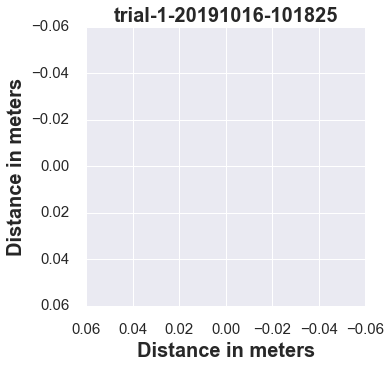

In [22]:
#plot raw data
sns.set()
for i in [0]:#range(len(allfiles_x)):
    fig, axs = plt.subplots(1,1,figsize=(5,5))  
    
    centered_x = allfiles_x[i] - allfiles_x[i][0]
    centered_y = allfiles_y[i] - allfiles_y[i][0]
    centered_x_food = allfiles_x_food[i] - allfiles_x[i][0]
    centered_y_food = allfiles_y_food[i] - allfiles_y[i][0]    
    
    plt.plot(centered_x, centered_y, 'k')
    plt.scatter(centered_x[0], centered_y[0], color = 'g', s = 50)
    #plt.scatter(centered_x_food, centered_y_food, color = 'r', s = 100)
    
    for j in range(len(centered_x_food)):
        circle= plt.Circle((centered_x_food[j],centered_y_food[j]), radius= 0.01, color = 'r', alpha = 0.5)
        ax=plt.gca()
        ax.add_patch(circle)

    #plot format
    axs.set_aspect('equal')
    plt.axis('scaled')
    axs.yaxis.set_tick_params(labelsize=15)
    axs.xaxis.set_tick_params(labelsize=15)
    sns.despine(offset=10, trim=False);

    xmin, xmax = axs.get_xlim()
    ymin, ymax = axs.get_ylim()
    
    if xmin<ymin:
        mymin = xmin
    else:
        mymin = ymin
        
    if xmax>ymax:
        mymax = xmax
    else:
        mymax = ymax  
        
    if np.abs(mymax)>np.abs(mymin):
        mylim = mymax
    else:
        mylim = mymin
    axs.set_ylim(-mylim, mylim)
    axs.set_xlim(-mylim, mylim)
    
    axs.set_xlabel('Distance in meters', fontsize = 20, fontweight = 'bold')
    axs.set_ylabel('Distance in meters', fontsize = 20, fontweight = 'bold')
    plt.title(all_experiment_names[i], fontsize = 20, fontweight = 'bold')
    
#     savefigdir = '/Users/fponce/Documents/pilot_round_2/fponce_plots/'
#     fig.savefig(savefigdir+all_experiment_names[i]+'.pdf', bbox_inches='tight', transparent = True)

In [28]:
#Calculate distances between food and previous food

def calculateDistance(dx,dy):  
    dist = math.sqrt((dx)**2 + (dy)**2)  
    return dist

def calculateDistance_list(dx,dy):
    distances = []
    for i in range(len(dx)):
        d = calculateDistance(dx[i],dy[i])
        distances.append(d)
    return distances

In [29]:
#Get centered x, y, and foods
#Get filenames that never got food
#Calculate distances between foods

all_centered_x = []
all_centered_y = []

for i in range(len(allfiles_x)): 
    
    centered_x = allfiles_x[i] - allfiles_x[i][0]
    centered_y = allfiles_y[i] - allfiles_y[i][0] 

    all_centered_x.append(centered_x)
    all_centered_y.append(centered_y)


all_centered_x_food = []
all_centered_y_food = []

for i in range(len(allfiles_x)): 
    
    centered_x_food = allfiles_x_food[i] - allfiles_x[i][0]
    centered_y_food = allfiles_y_food[i] - allfiles_y[i][0] 

    all_centered_x_food.append(centered_x_food)
    all_centered_y_food.append(centered_y_food)

#trials that never got food stimuli
# for i in range(len(all_centered_x_food)): 
#     if len(all_centered_x_food[i])==0:
#         print(all_experiment_names[i])

all_inter_food_distances = []
for i in range(len(all_centered_x_food)): 
    dif_x = np.diff(all_centered_x_food[i])
    dif_y = np.diff(all_centered_y_food[i])

    d = calculateDistance_list(dif_x, dif_y)    
    all_inter_food_distances.append(d)

# plt.plot(all_inter_food_distances[0], '.', markersize = 10)
# plt.title(all_experiment_names [0])
# print(len(all_inter_food_distances[0]))

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


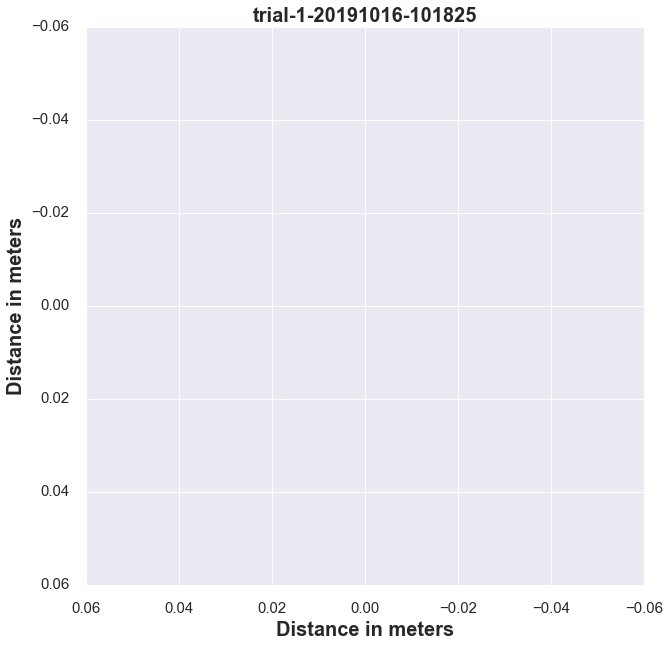

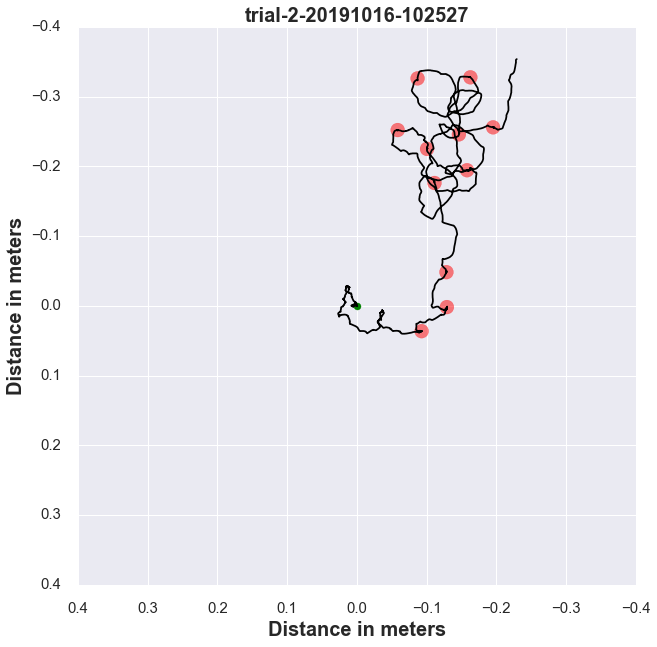

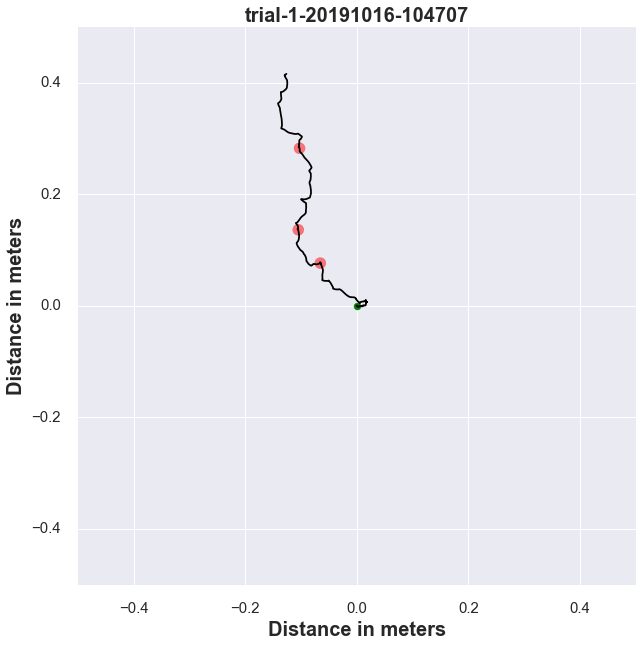

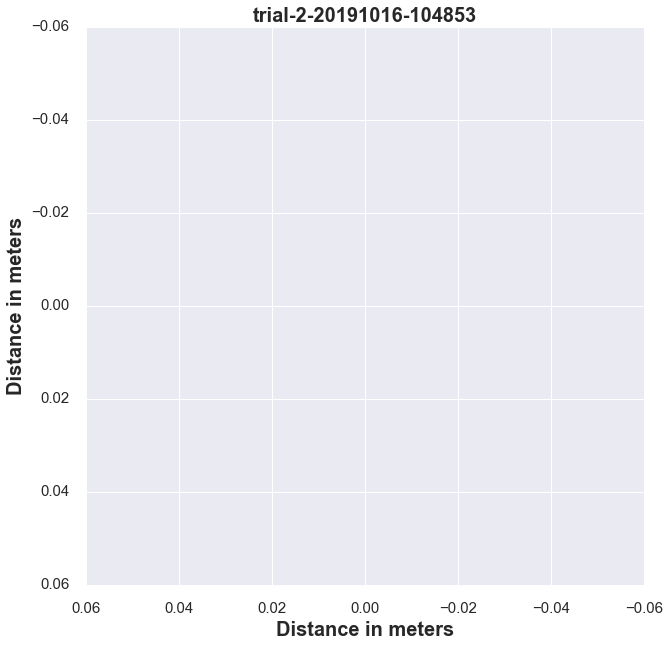

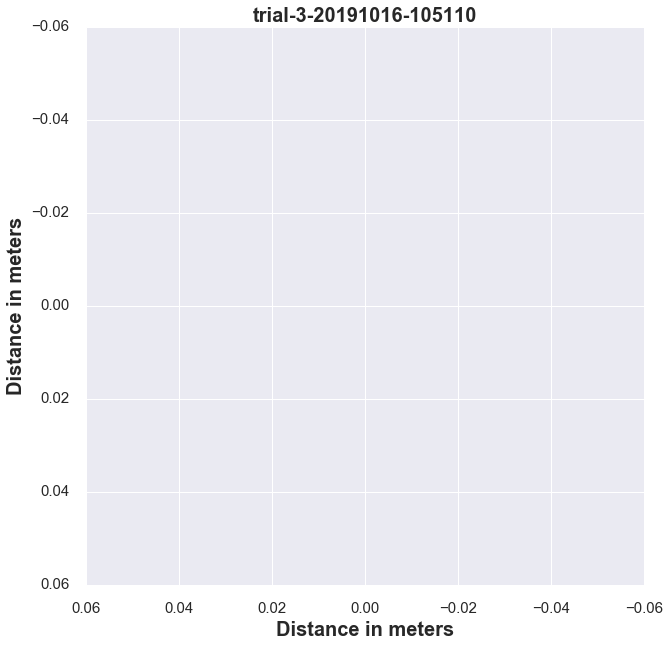

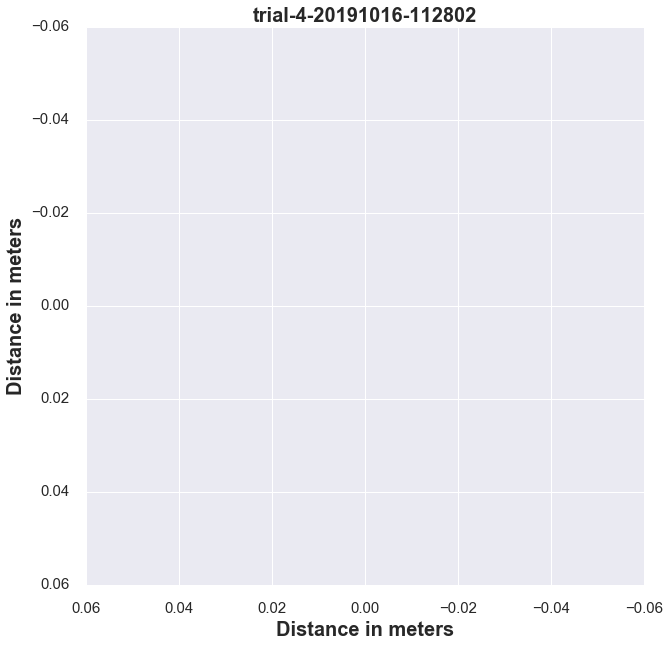

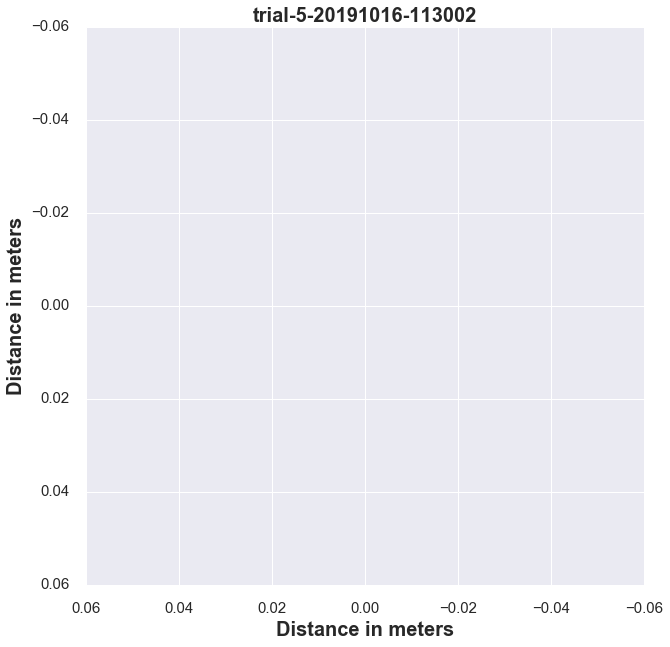

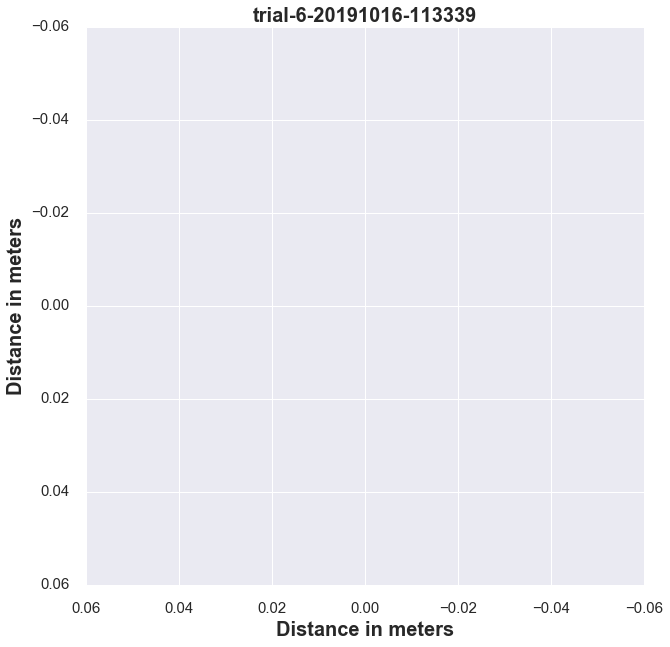

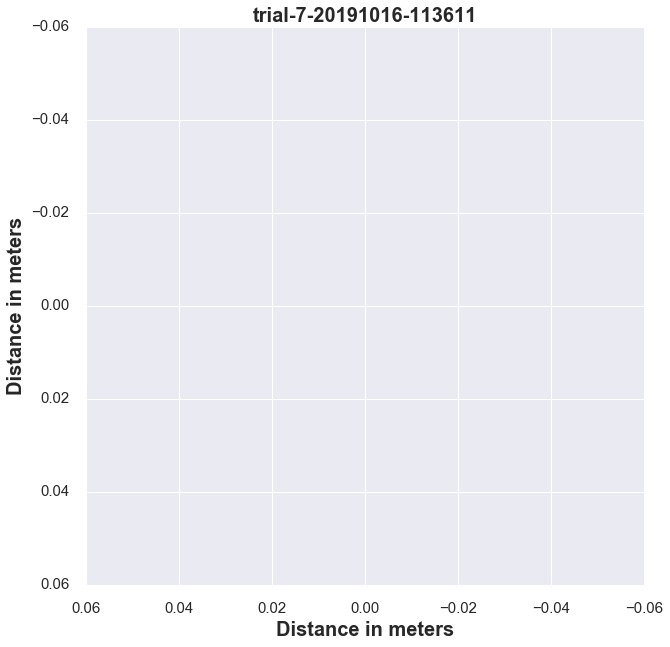

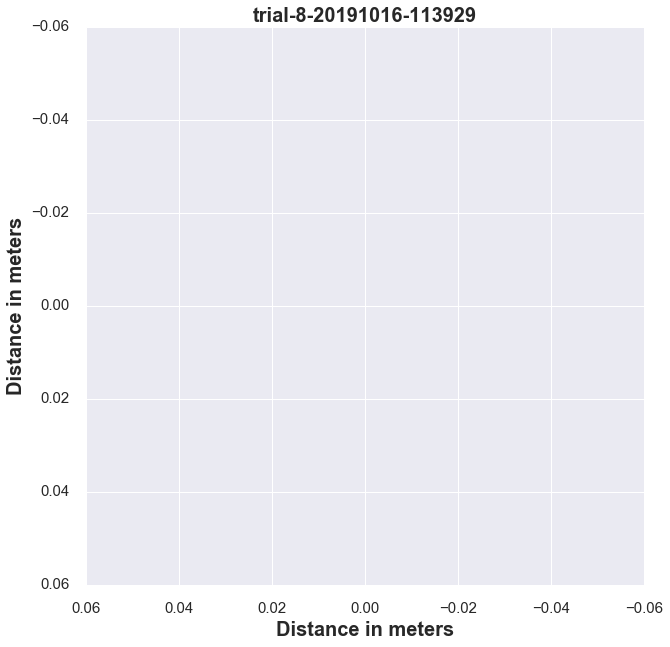

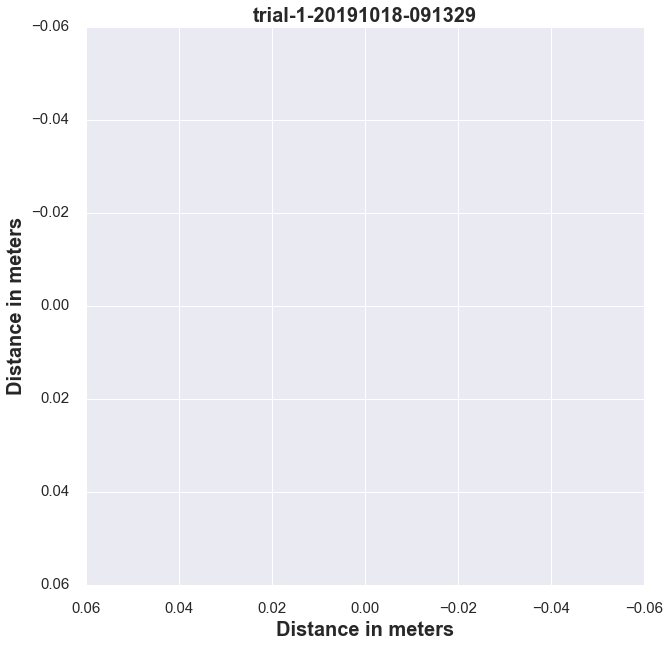

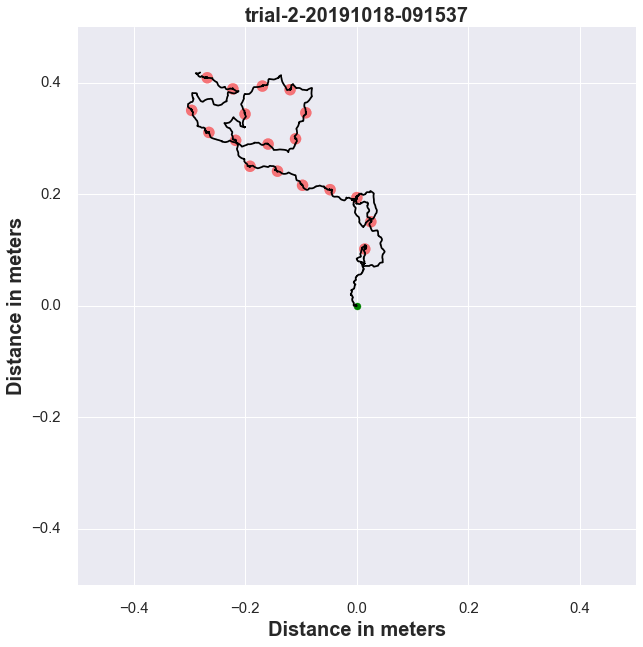

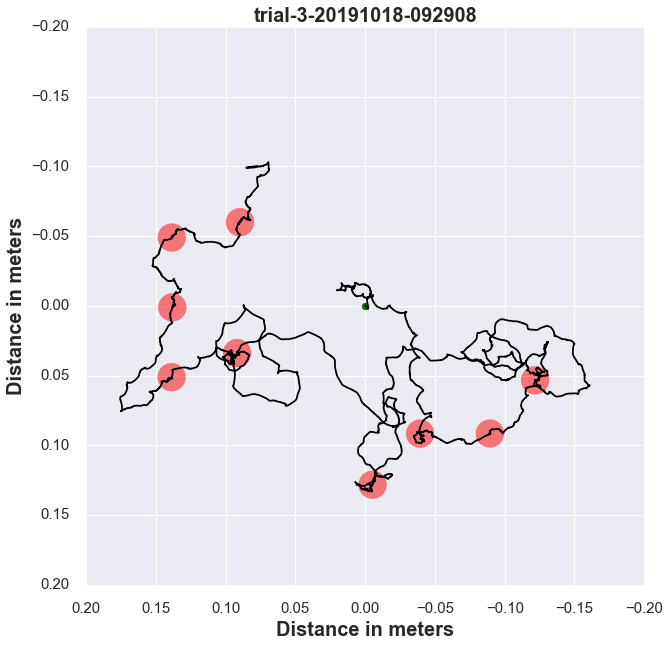

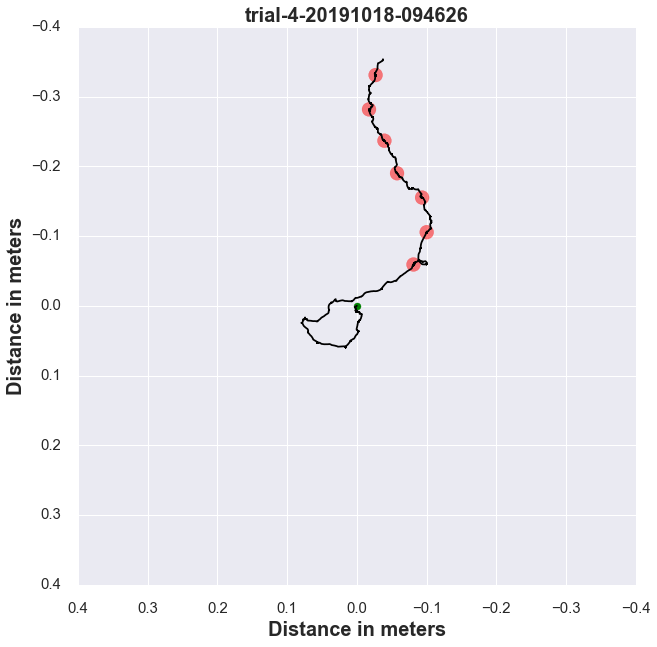

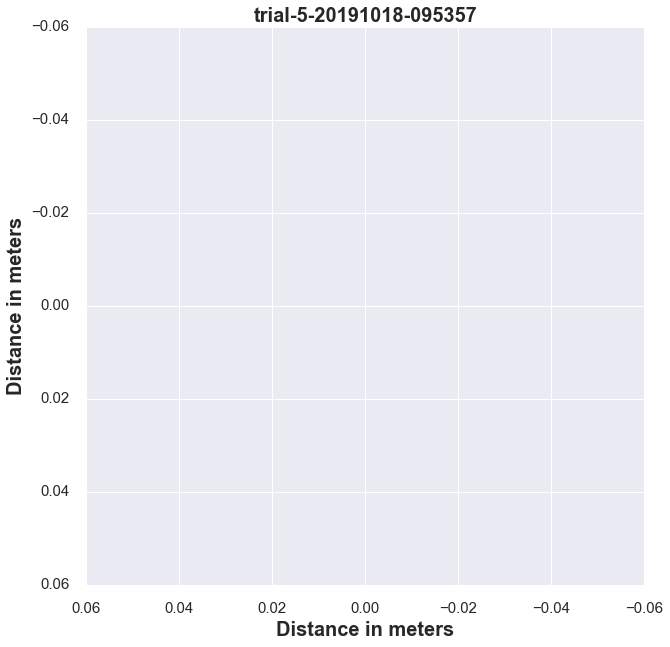

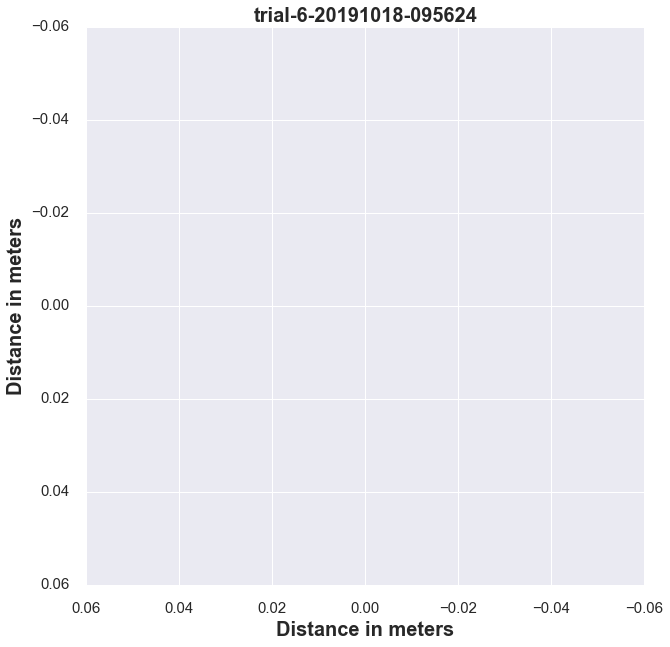

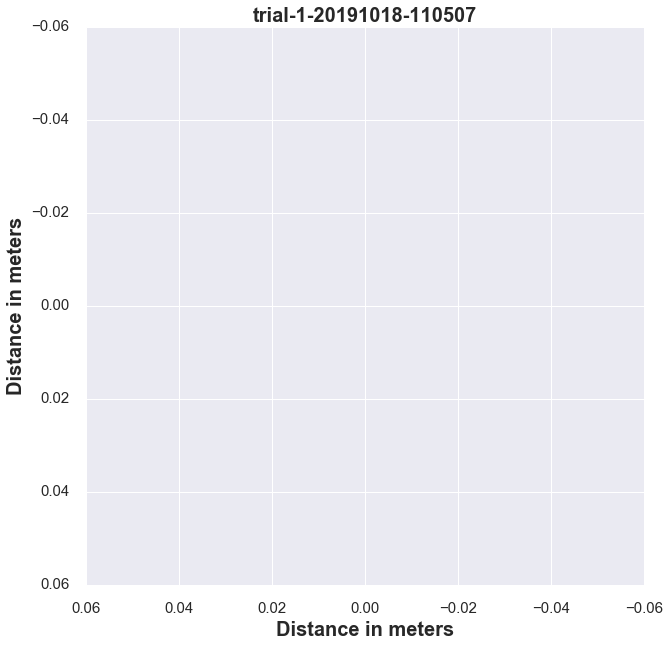

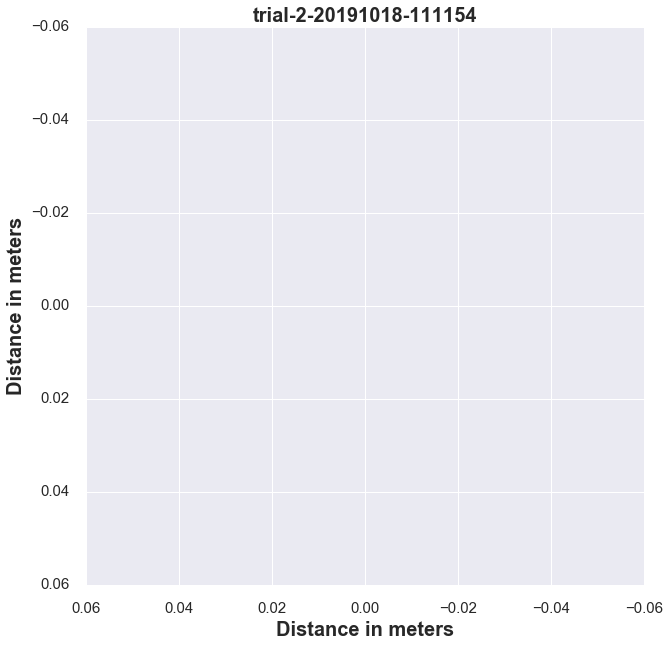

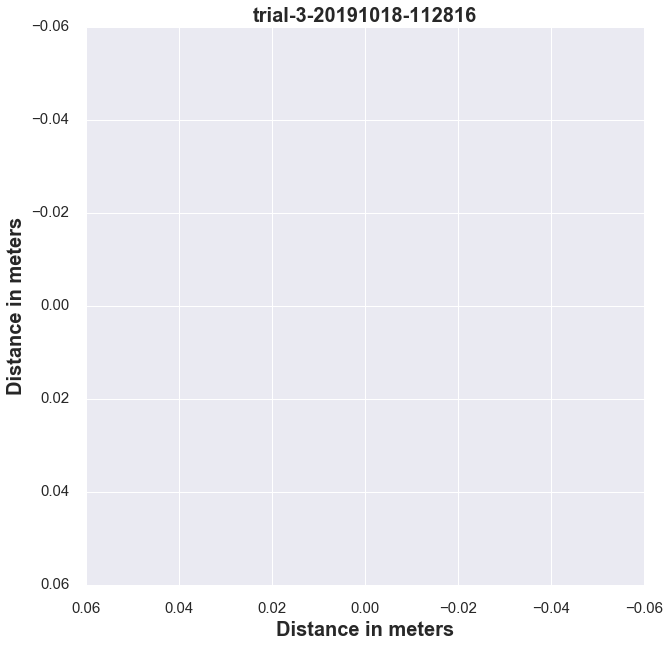

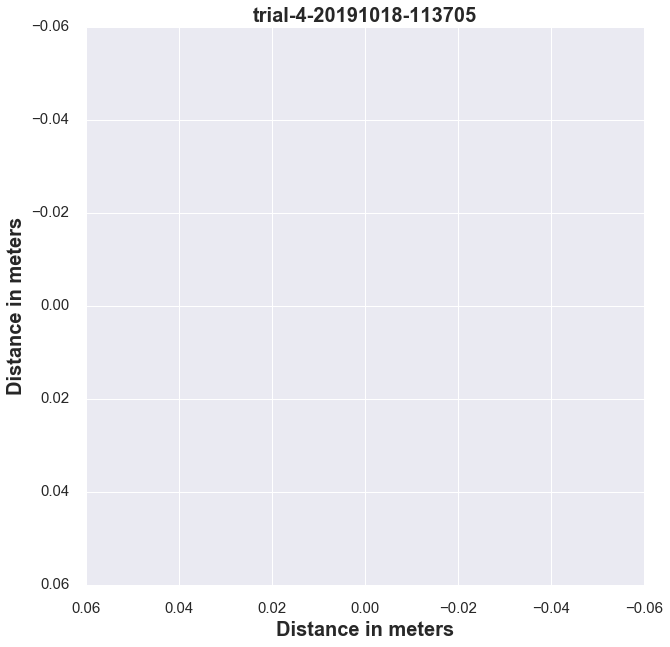

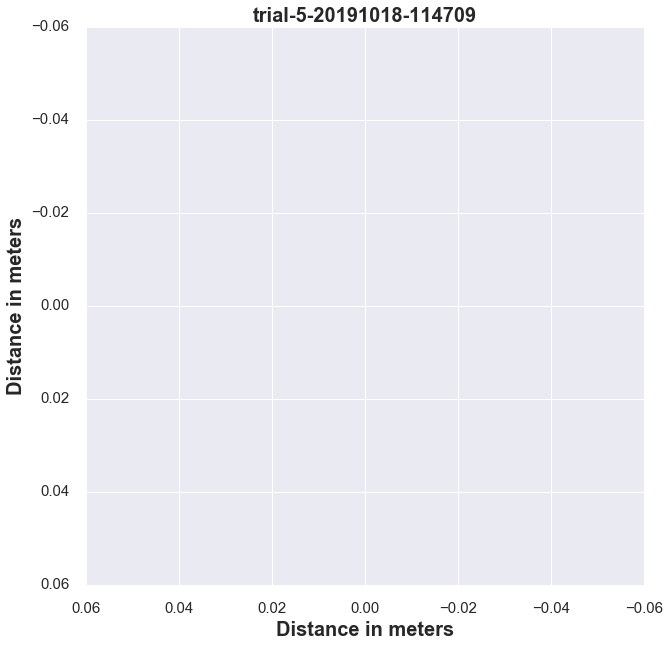

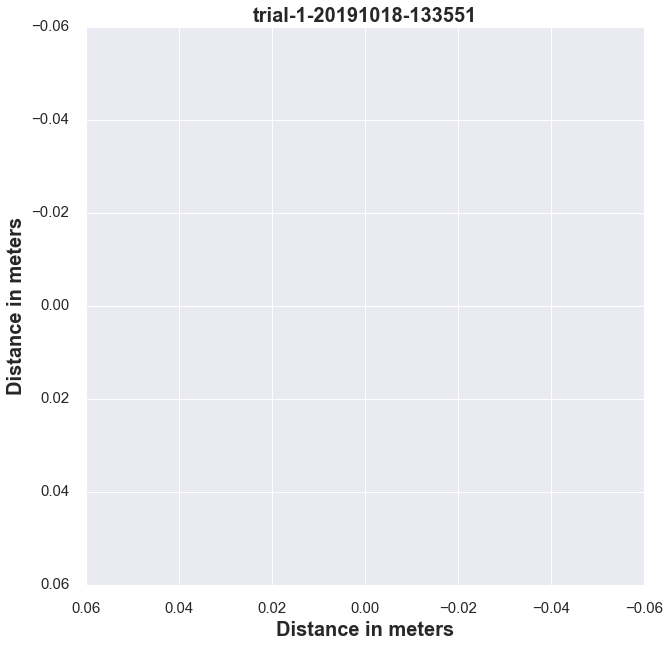

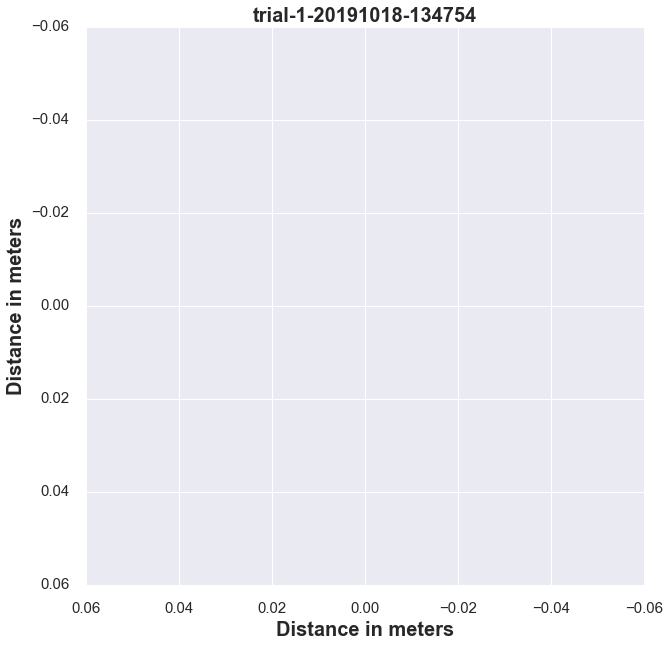

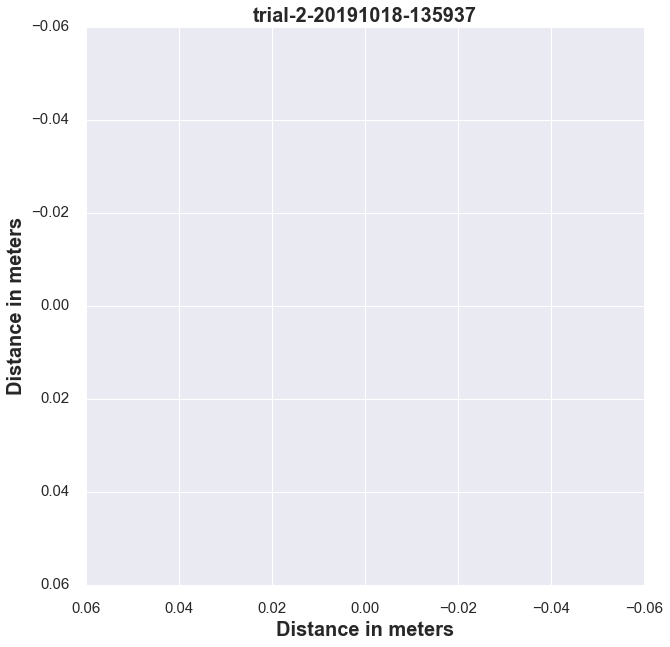

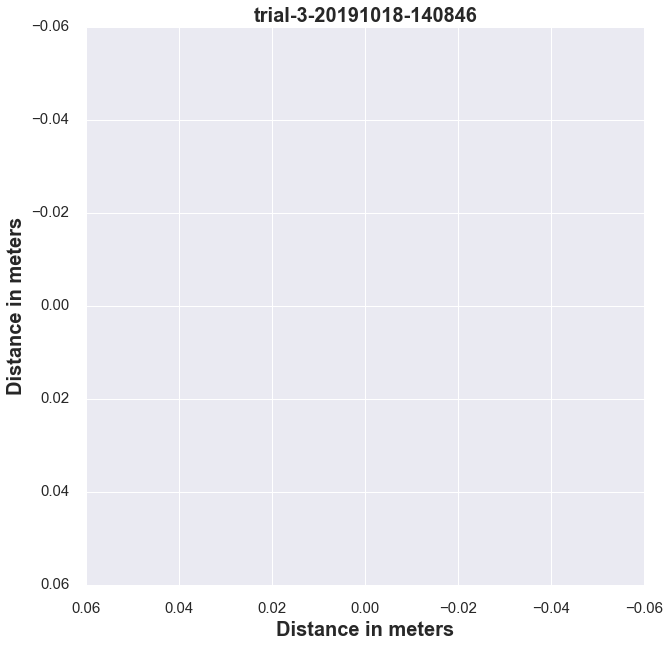

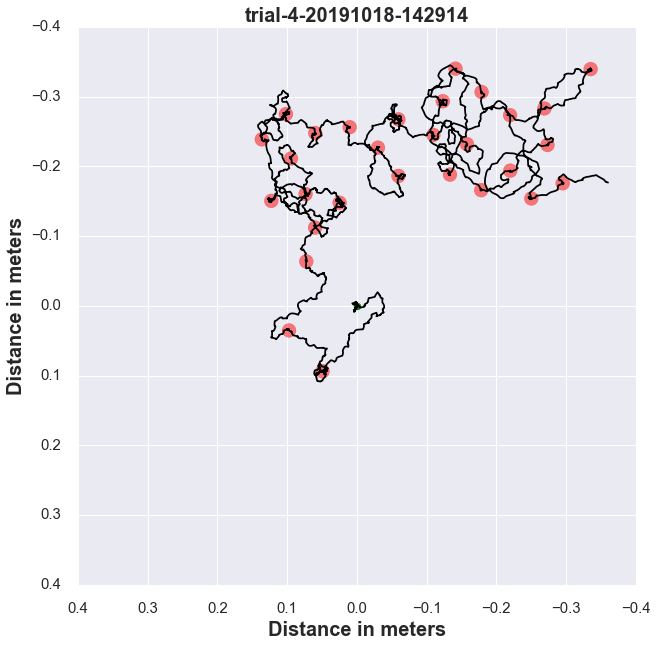

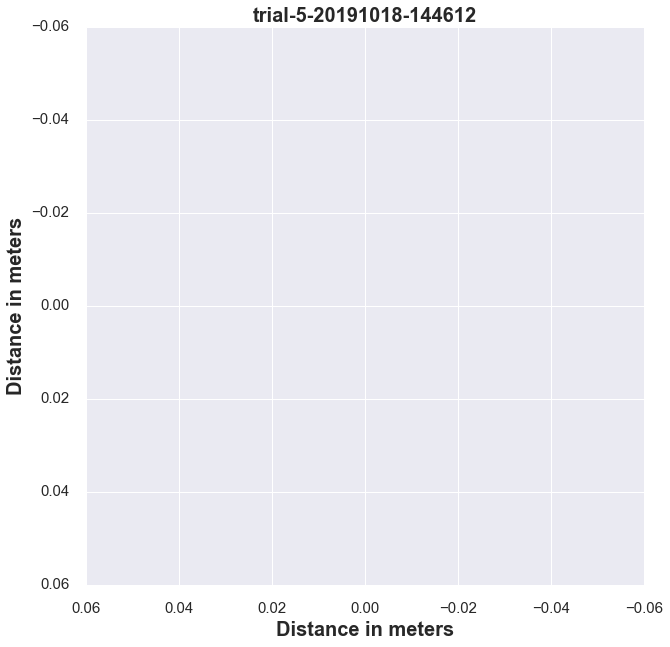

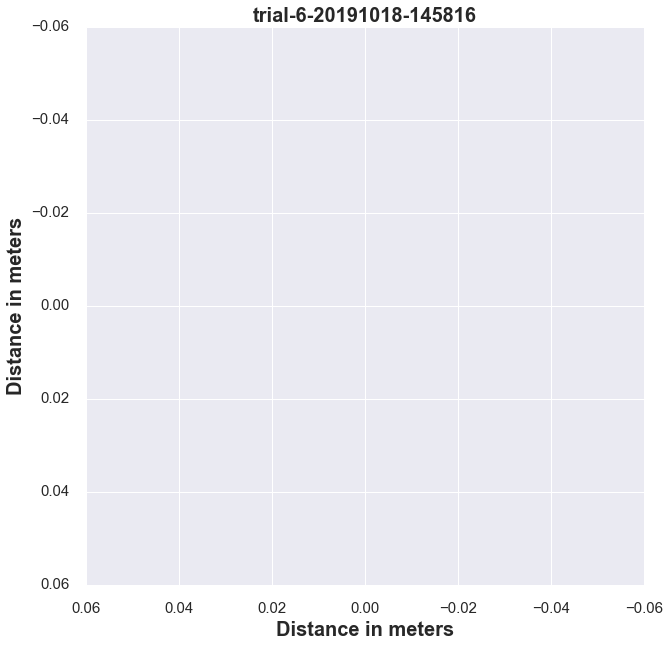

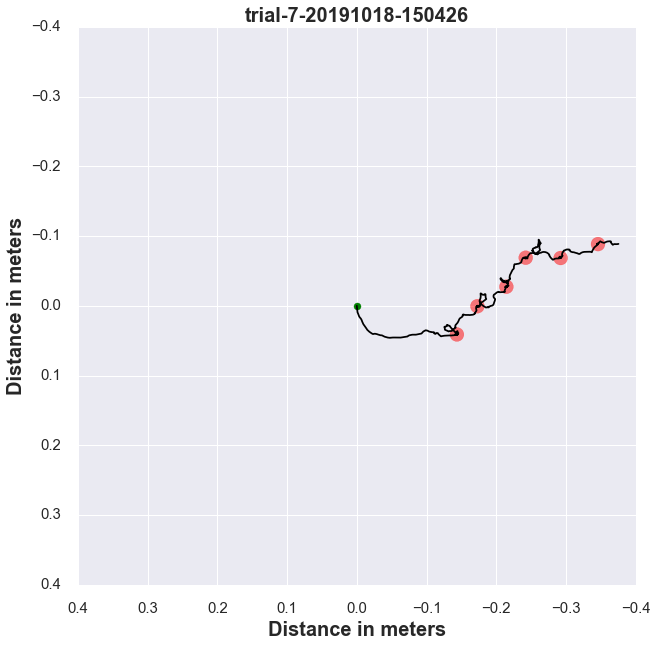

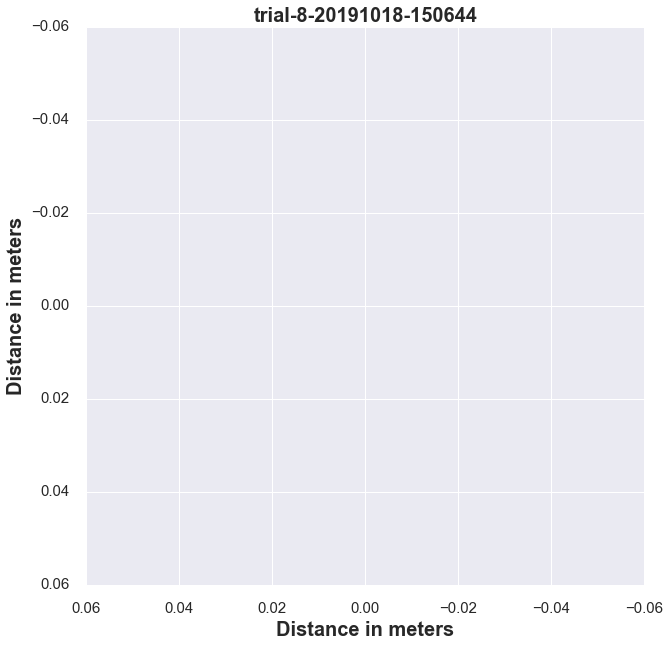

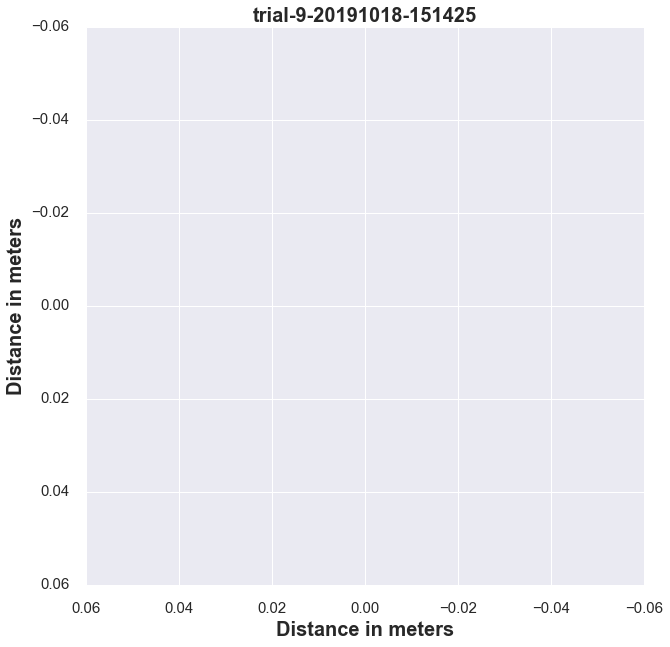

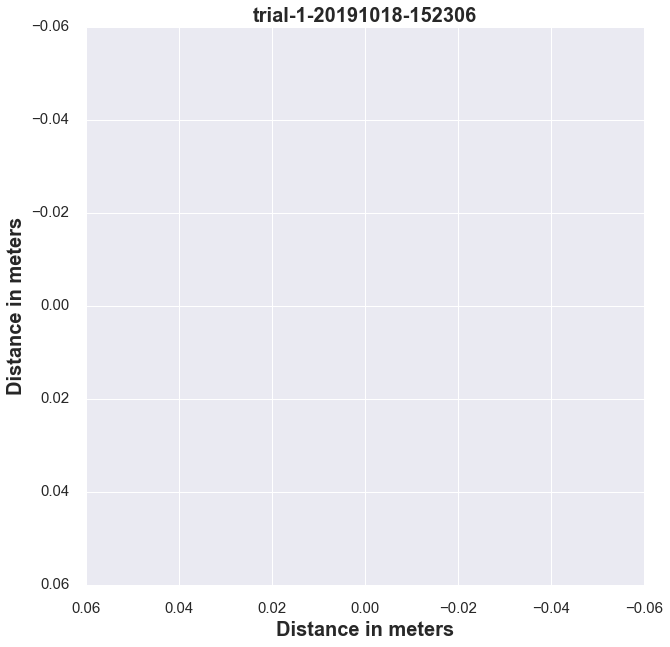

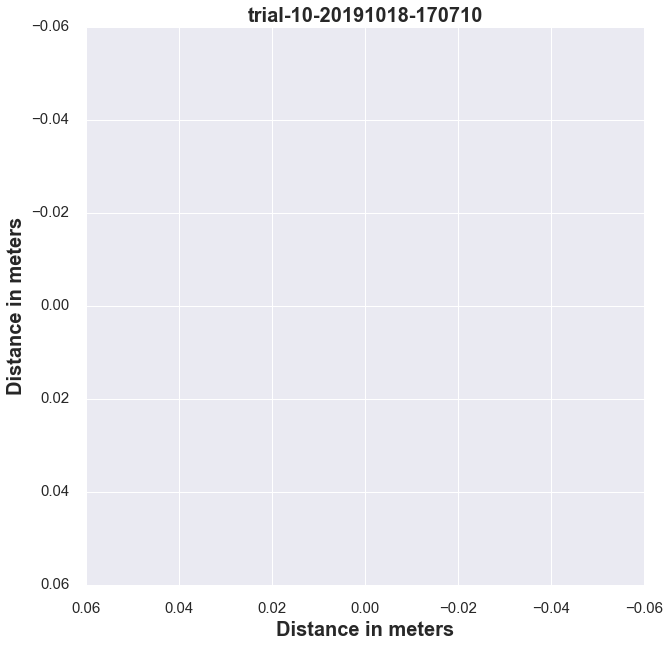

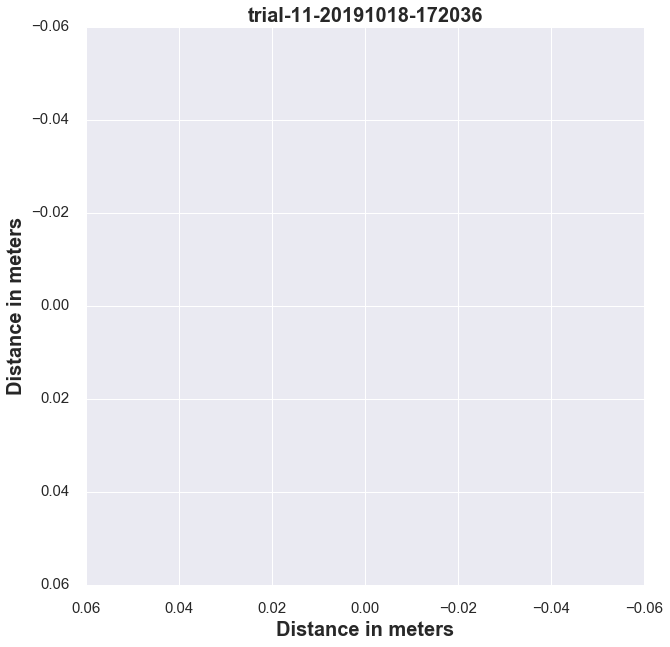

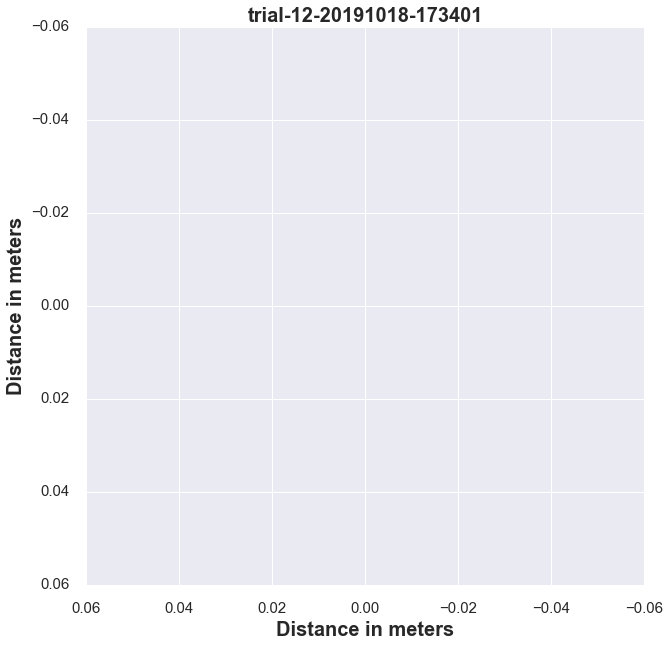

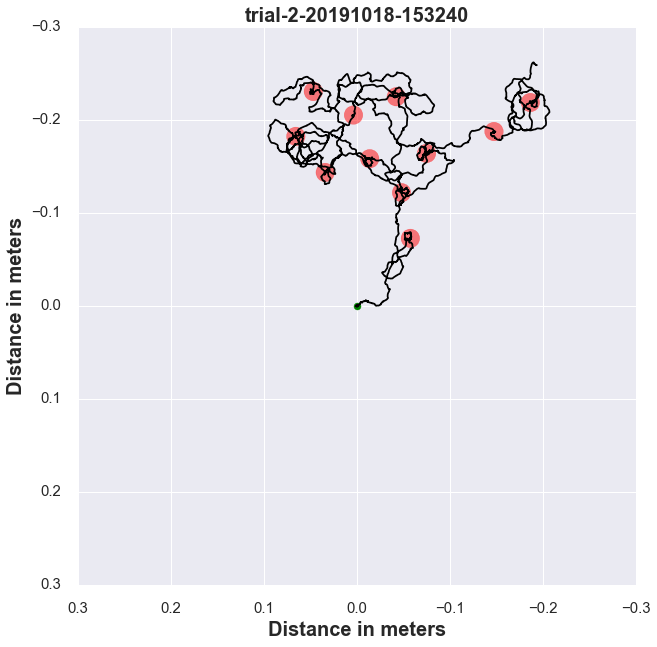

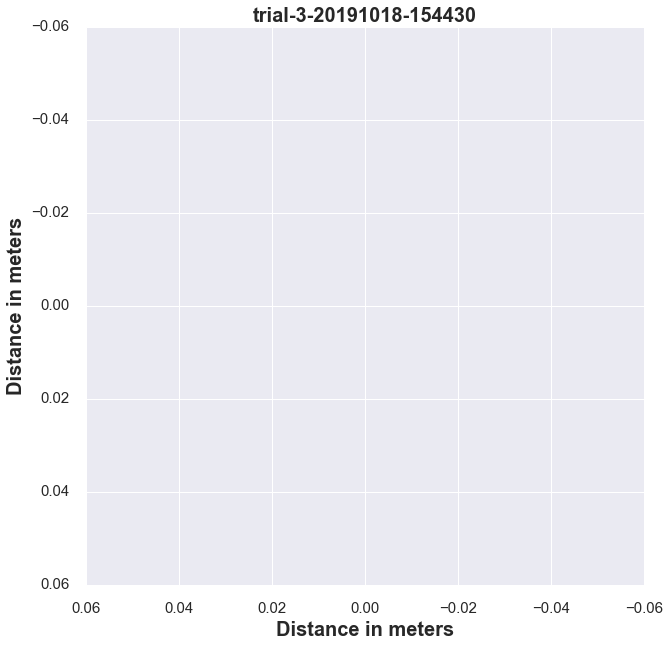

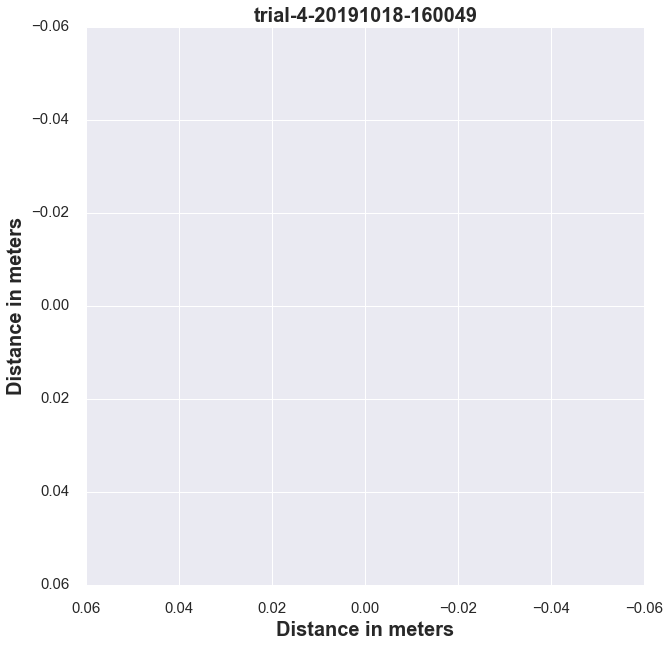

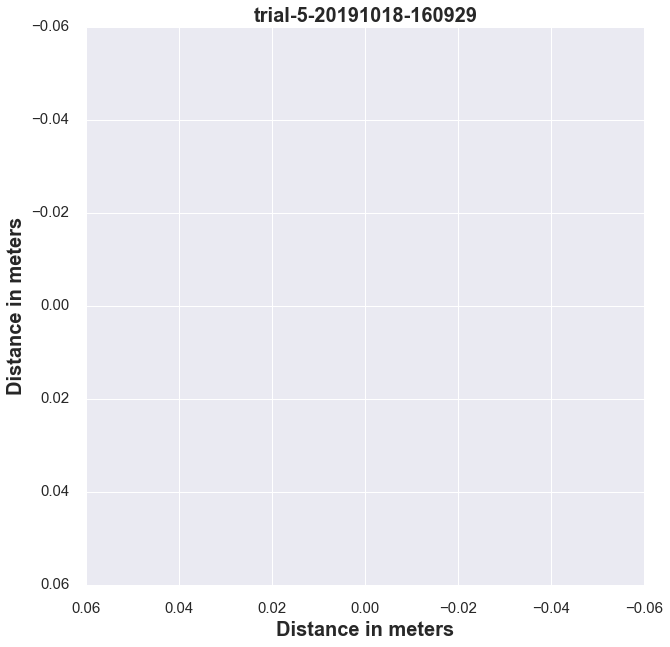

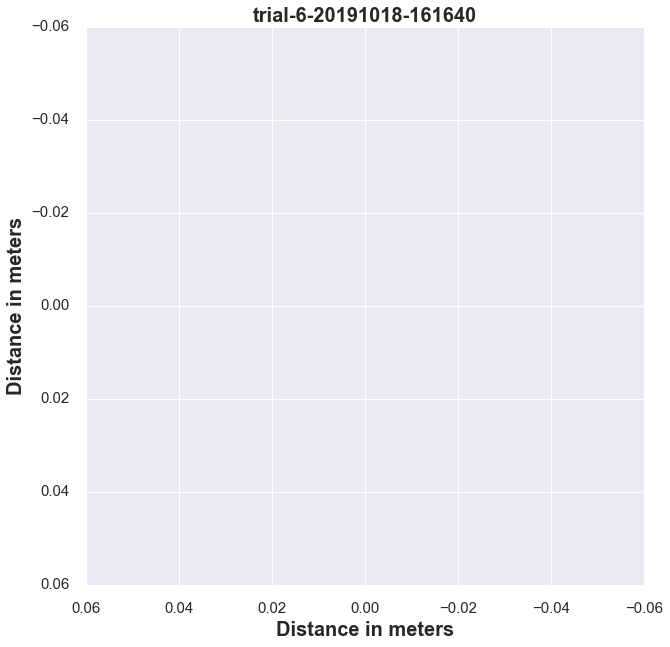

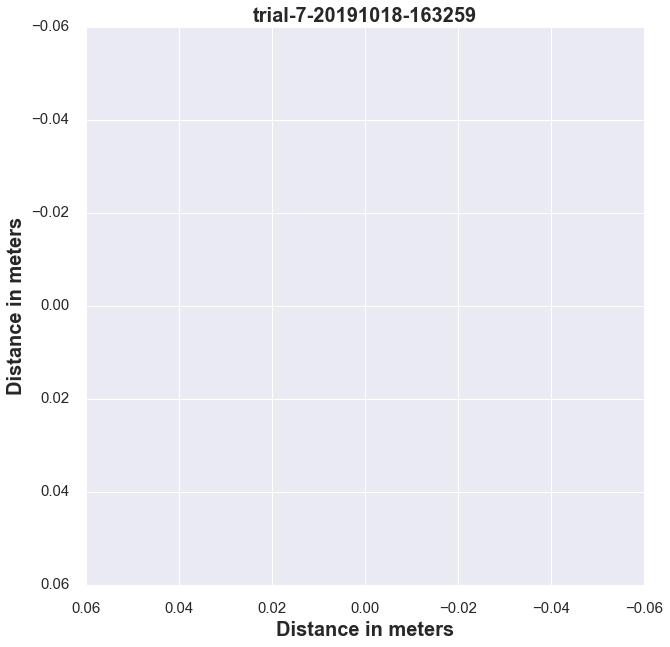

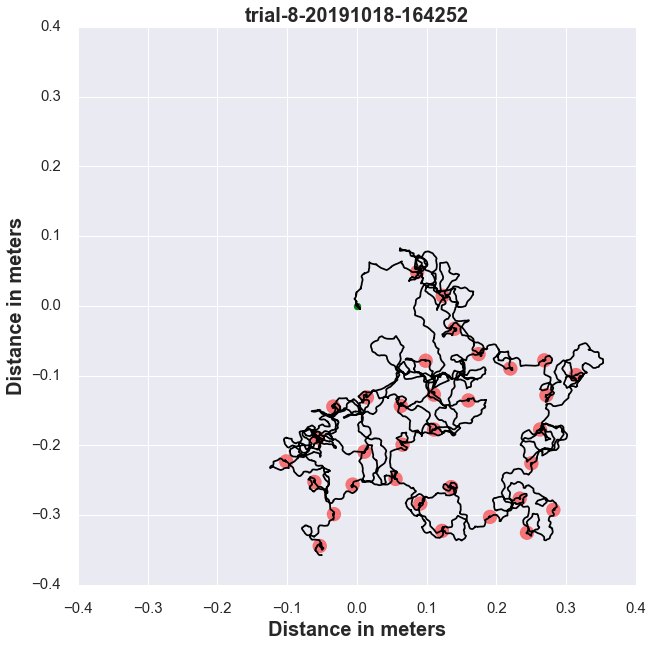

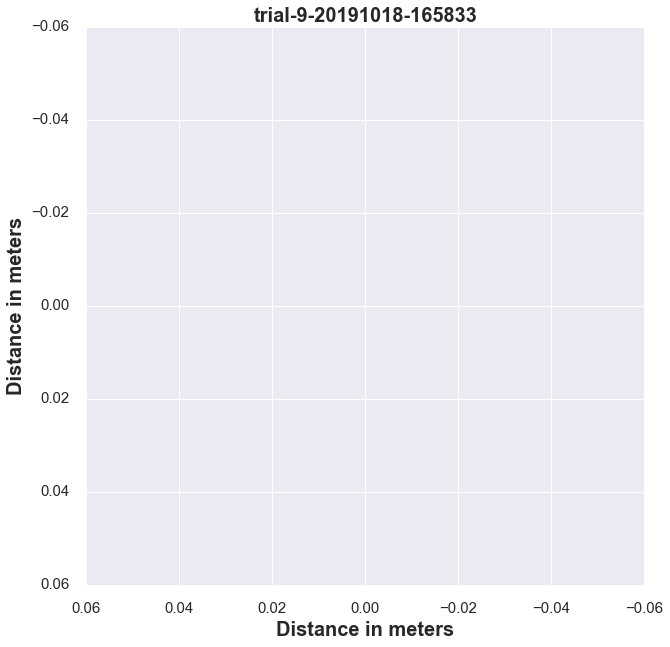

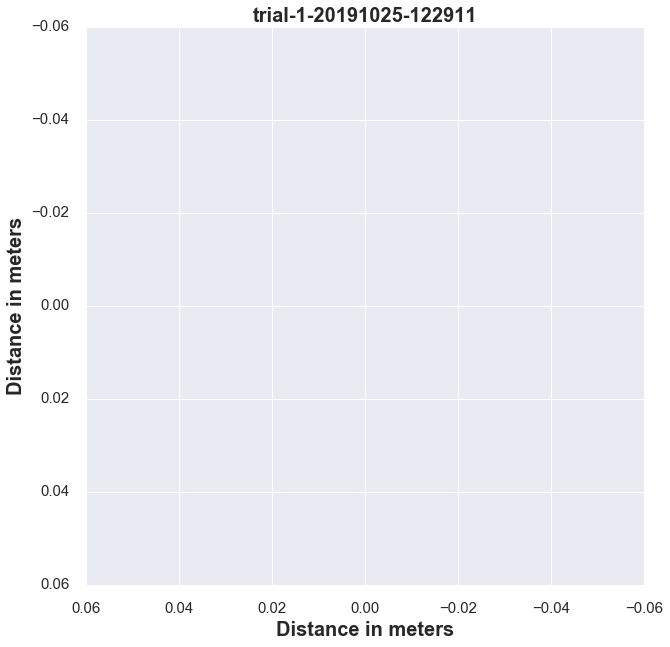

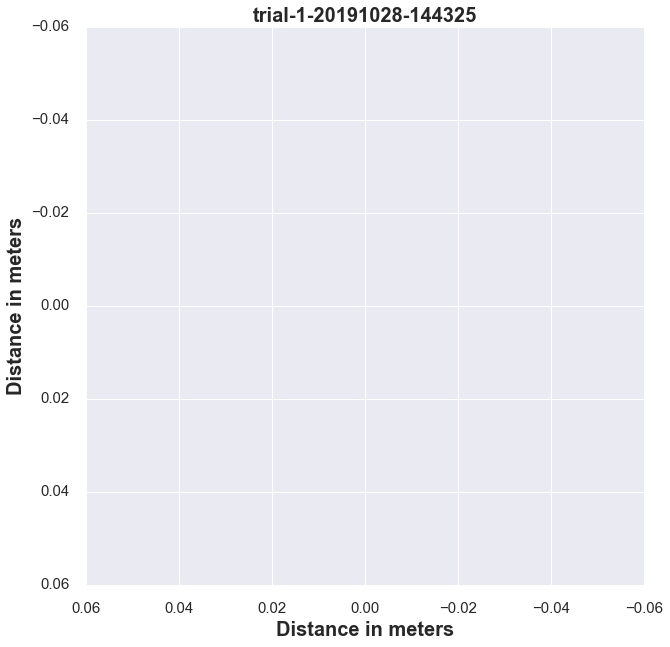

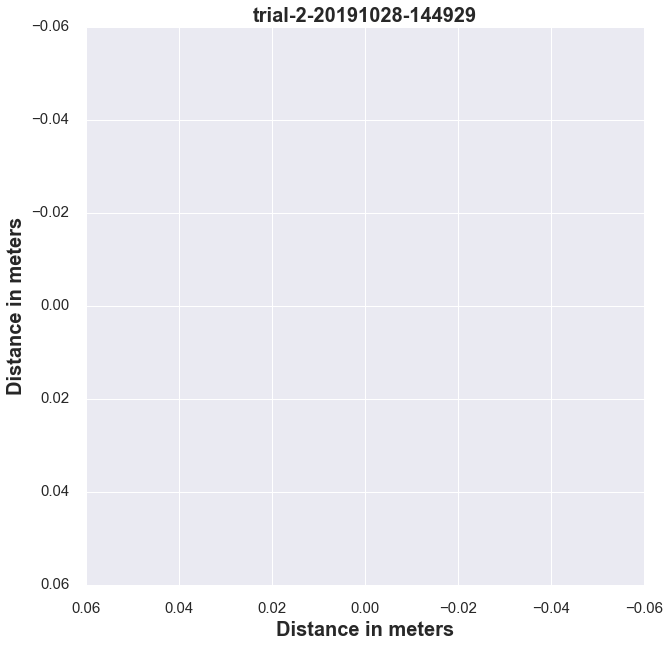

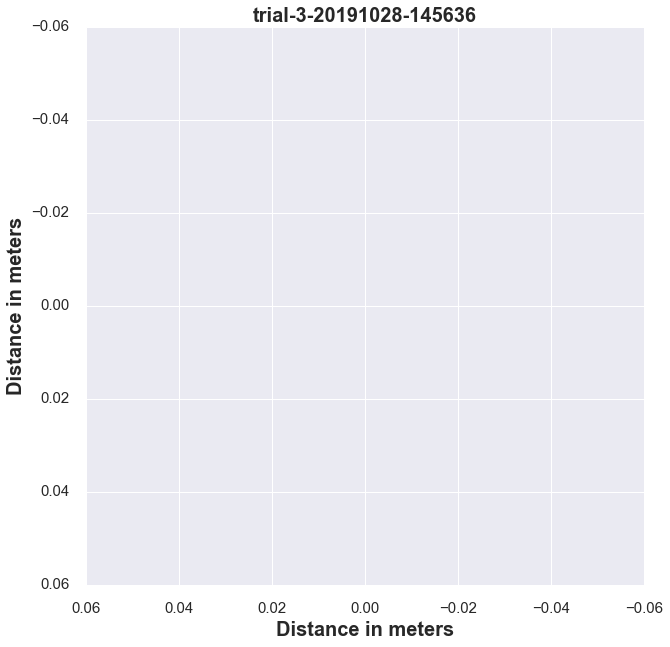

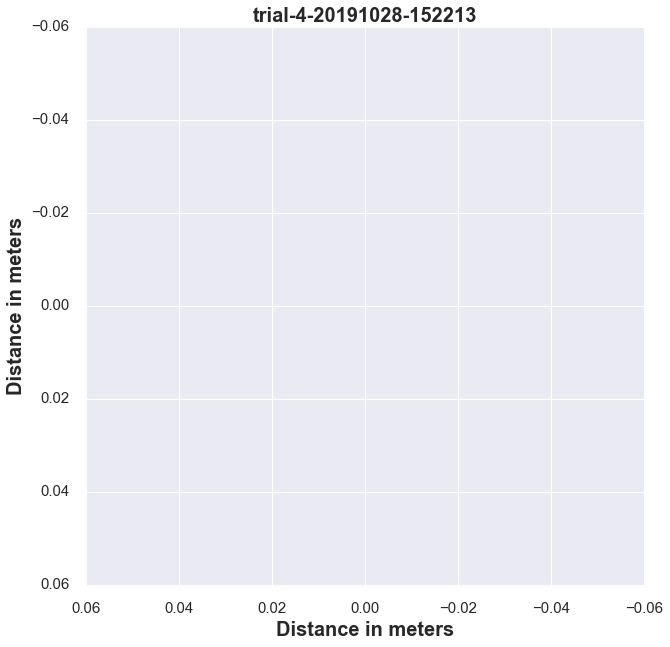

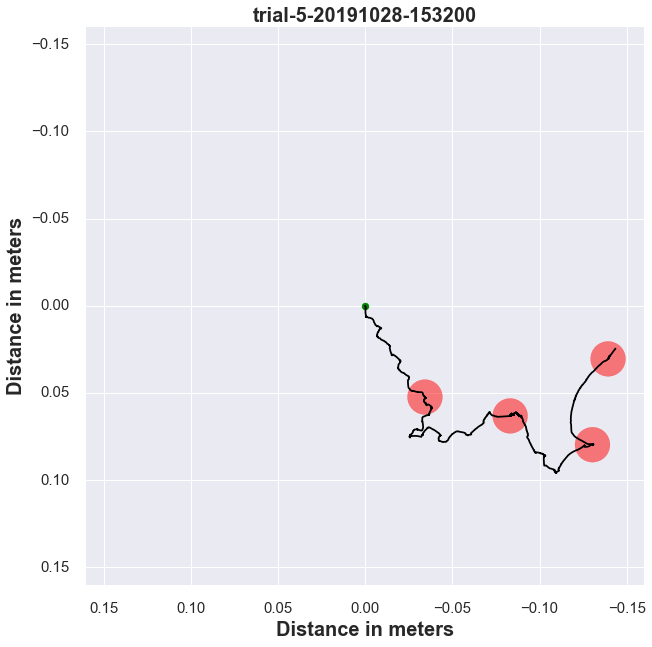

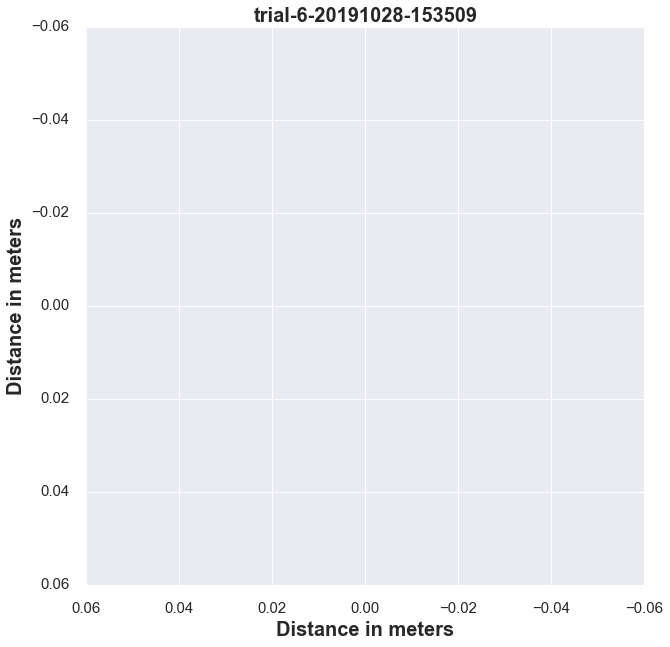

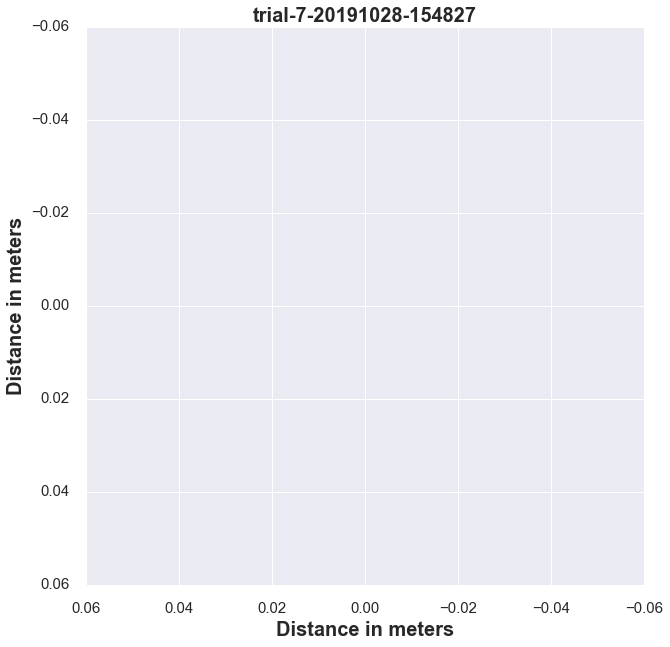

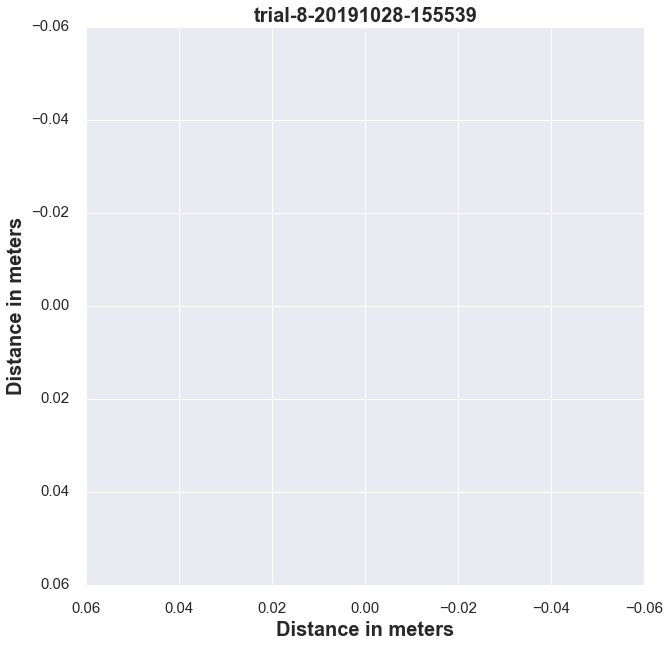

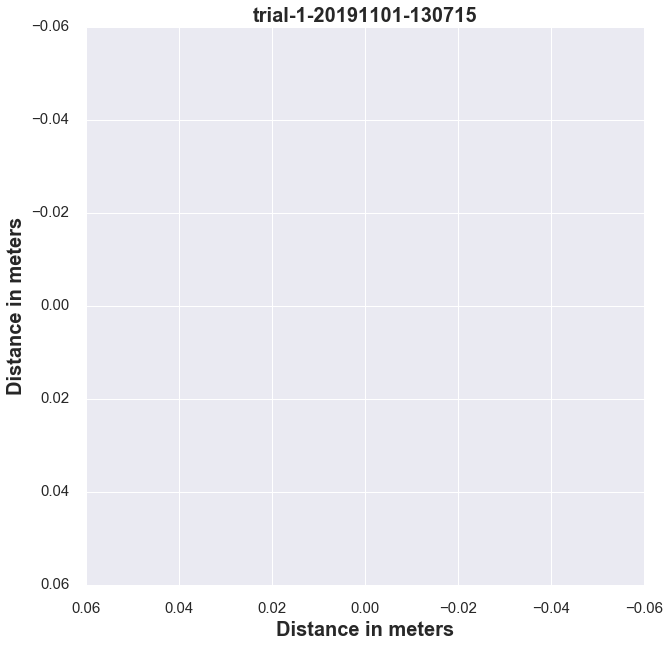

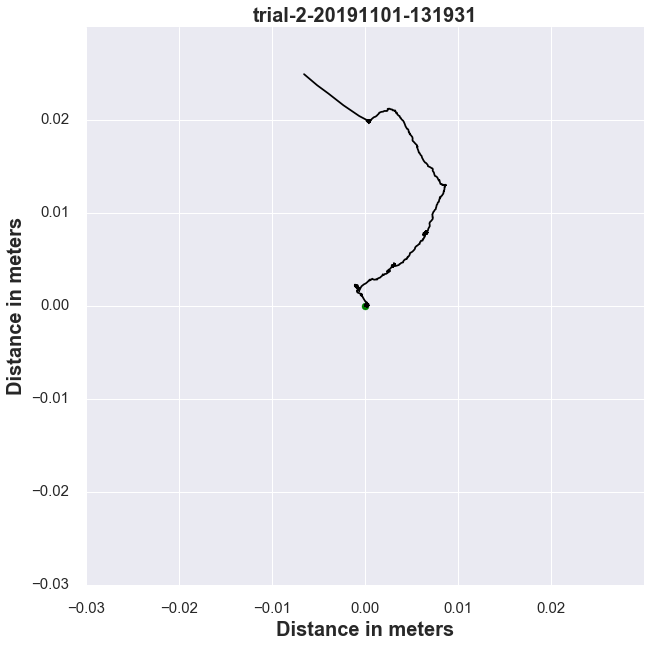

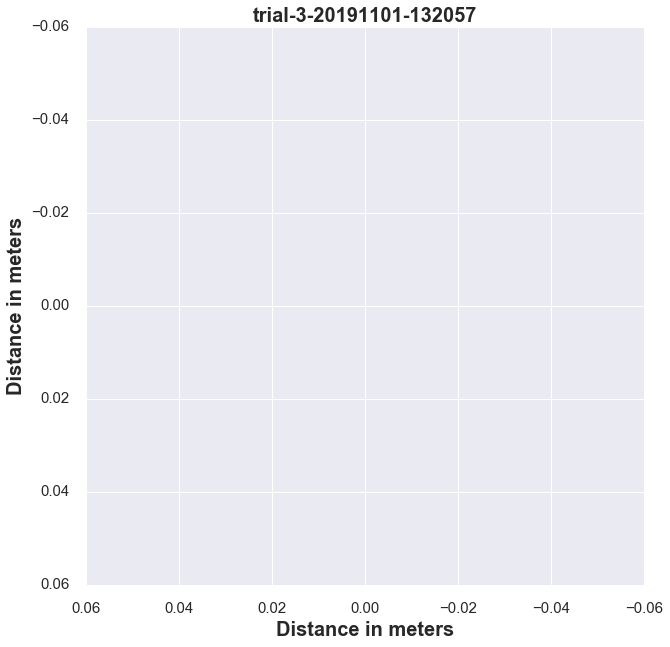

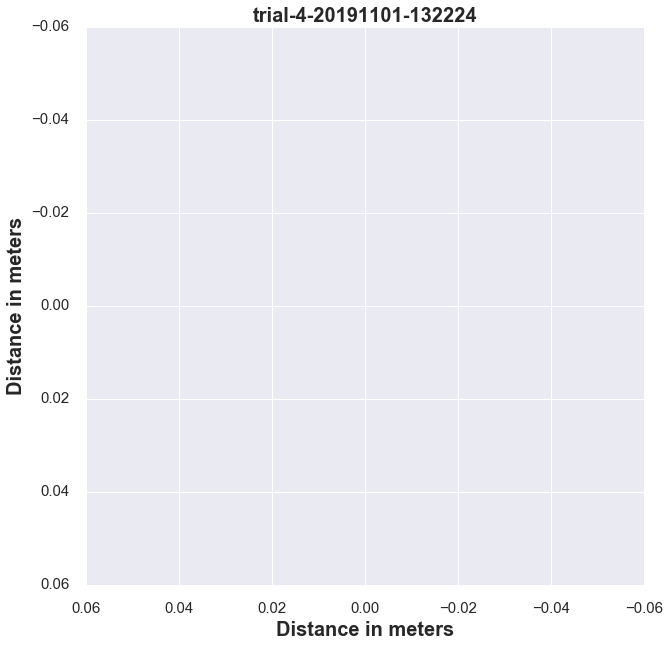

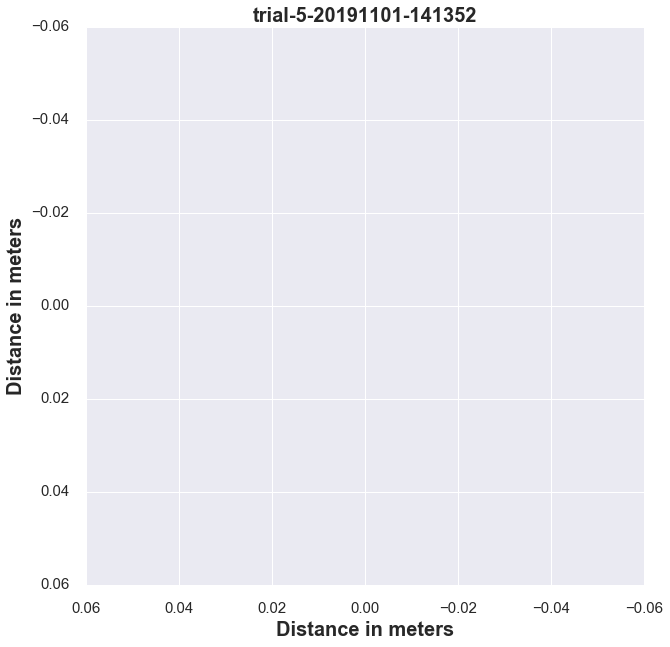

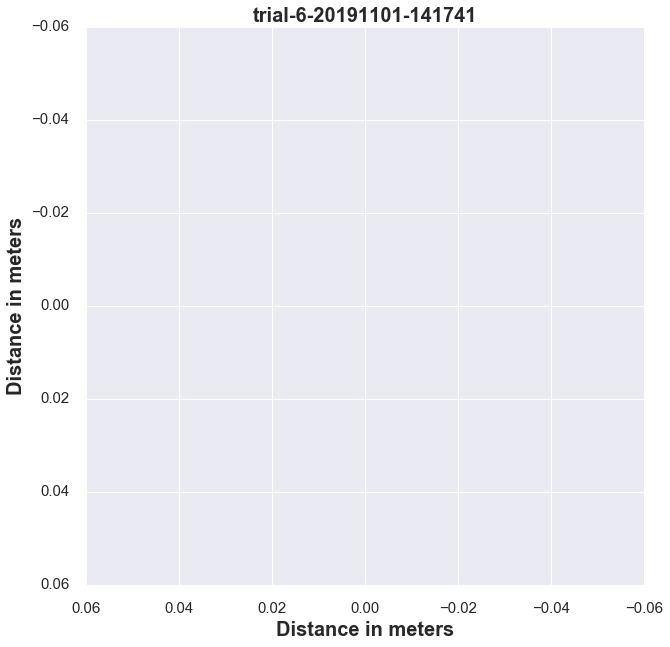

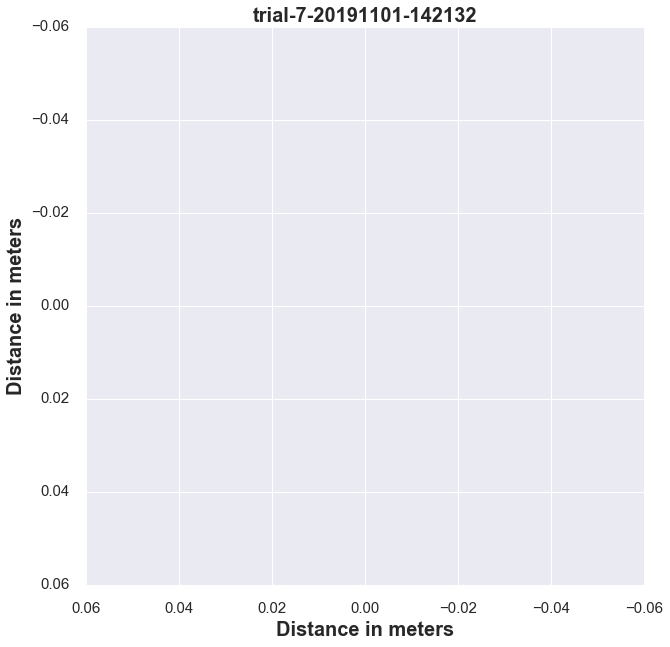

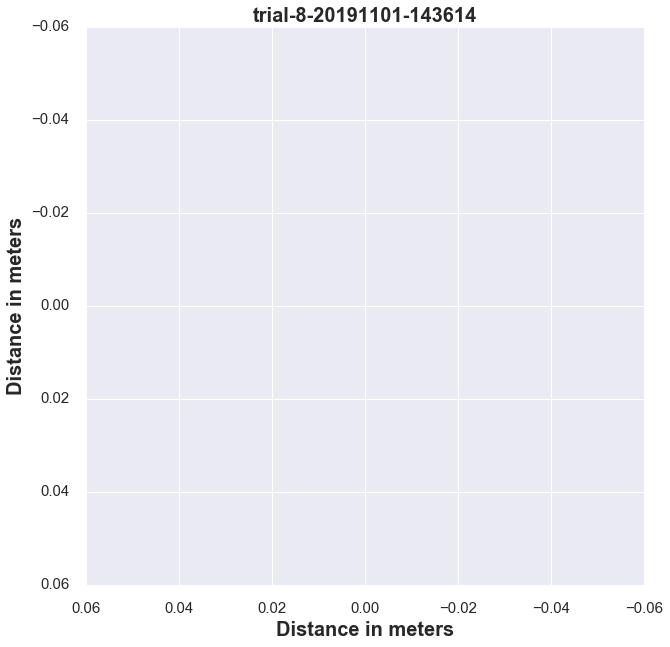

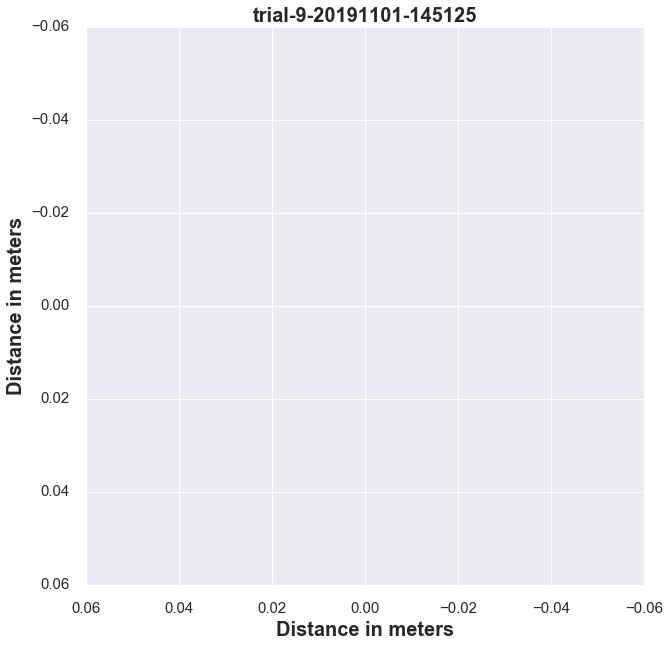

In [30]:
#Save raw data
# savefigdir_15 = '/Users/fponce/Documents/pilot_stanford_091719/plots_093019/food_15cm/'
# savefigdir_10 = '/Users/fponce/Documents/pilot_stanford_091719/plots_093019/food_10cm/'
# savefigdir_5 = '/Users/fponce/Documents/pilot_stanford_091719/plots_093019/food_5cm/'
# savefigdir_20 = '/Users/fponce/Documents/pilot_stanford_091719/plots_093019/food_20cm/'

savefigdir = '/Users/fponce/Documents/pilot_round_2/fponce_plots/'

for i in range(len(all_centered_x_food)): 
    if all_food_condition[i] == 5:
        plot_raw_data(all_centered_x[i], all_centered_y[i],\
                      all_centered_x_food[i], all_centered_y_food[i], 
                      all_experiment_names[i], savefigdir)


In [ ]:
for i in range(len(allfiles_t_cam)):